In [6]:
# Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df = df[df['job_title_short'] == 'Data Analyst']    

In [17]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

C:\Users\dev\AppData\Local\Temp\ipykernel_7976\1457573700.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(skills_stats['skill_count'][i], skills_stats['median_salary'][i], txt)


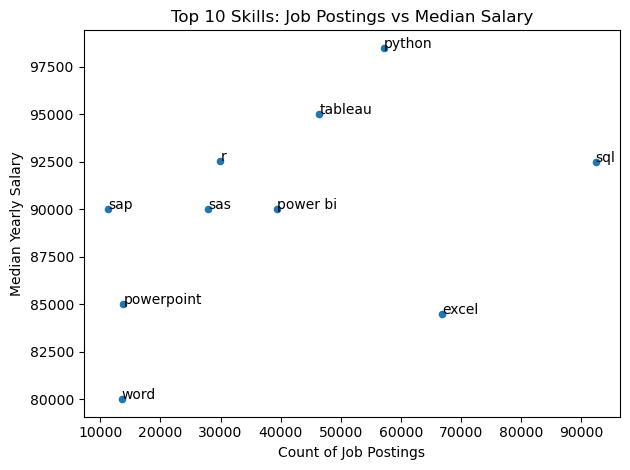

In [25]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Top 10 Skills: Job Postings vs Median Salary')
plt.tight_layout()


for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'][i], skills_stats['median_salary'][i], txt)

plt.show()